PROBLEM STATEMENT - The analysis focuses on identifying top-rated restaurants, understanding the relationship between ratings, cost, and votes, examining the impact of online delivery, and exploring the popularity of different cuisines.

- Prathmesh Maurya(2023570684)


1)	Merge the country sheet and Zomato file to get the country code

In [ ]:
import pandas as pd
import numpy as np

zomato_df = pd.read_csv('/content/zomato_Dataset.csv', encoding='latin-1')

In [ ]:
country_dict = {
    1: 'India', 14: 'Australia', 30: 'Brazil', 37: 'Canada', 94: 'Indonesia',
    148: 'New Zealand', 162: 'Philippines', 166: 'Qatar', 184: 'Singapore',
    189: 'South Africa', 191: 'Sri Lanka', 208: 'Turkey', 214: 'UAE', 215: 'United Kingdom',
    216: 'United States'
}

zomato_df['Country'] = zomato_df['Country Code'].map(country_dict)

zomato_df[['Restaurant Name', 'Country Code', 'Country']].head()

,Restaurant Name,Country Code,Country
0,Le Petit Souffle,162,Philippines
1,Izakaya Kikufuji,162,Philippines
2,Heat - Edsa Shangri-La,162,Philippines
3,Ooma,162,Philippines
4,Sambo Kojin,162,Philippines


2)	Get the Top rated restaurants in each city in India(On the basis of rating and votes).

In [ ]:
india_df = zomato_df[zomato_df['Country'] == 'India']

top_rated_india = india_df.sort_values(['Aggregate rating', 'Votes'], ascending=[False, False])
top_rated_india = top_rated_india.drop_duplicates(subset=['City'])

top_rated_india[['City', 'Restaurant Name', 'Aggregate rating', 'Votes']]


,City,Restaurant Name,Aggregate rating,Votes
2414,Kolkata,Barbeque Nation,4.9,5966
2307,Hyderabad,AB's - Absolute Barbecues,4.9,5434
2495,Mumbai,Mirchi And Mime,4.9,3244
3013,New Delhi,Naturals Ice Cream,4.9,2620
2418,Lucknow,Grandson of Tunday Kababi,4.9,1057
822,Chennai,AB's - Absolute Barbecues,4.9,859
2289,Guwahati,Barbeque Nation,4.9,774
748,Bhopal,Sagar Gaire Fast Food,4.9,427
9262,Vizag,Barbeque Nation,4.9,345
2350,Jaipur,Zolocrust - Hotel Clarks Amer,4.9,322


3)	Finding out relationship between the rating and votes.

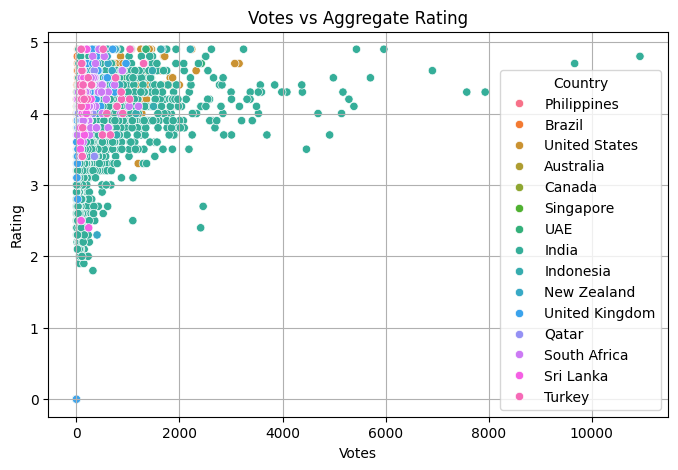

np.float64(0.31369058419541135)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=zomato_df, x='Votes', y='Aggregate rating', hue='Country')
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

correlation = zomato_df['Votes'].corr(zomato_df['Aggregate rating'])
correlation


4)	No of Restaurants in each country.

In [ ]:

restaurant_count = zomato_df.groupby('Country')['Restaurant ID'].count().sort_values(ascending=False)

restaurant_count = restaurant_count.reset_index().rename(columns={'Restaurant ID': 'Number of Restaurants'})
restaurant_count


,Country,Number of Restaurants
0,India,8652
1,United States,434
2,United Kingdom,80
3,UAE,60
4,South Africa,60
5,Brazil,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Philippines,22


5)	Top 5 restaurants with online delivery

In [ ]:

online_delivery_df = zomato_df[zomato_df['Has Online delivery'] == 'Yes']

top_online_delivery = online_delivery_df.sort_values(['Aggregate rating', 'Votes'], ascending=[False, False]).head(5)

top_online_delivery[['Restaurant Name', 'City', 'Country', 'Aggregate rating', 'Votes']]


,Restaurant Name,City,Country,Aggregate rating,Votes
3013,Naturals Ice Cream,New Delhi,India,4.9,2620
2350,Zolocrust - Hotel Clarks Amer,Jaipur,India,4.9,322
1381,Caterspoint,Gurgaon,India,4.9,223
841,CakeBee,Coimbatore,India,4.9,200
809,Chili's,Chennai,India,4.8,1262


6. Cheap but best restaurants in a city

In [ ]:
cheap_best = zomato_df[(zomato_df['Price range'] == 1) & (zomato_df['Aggregate rating'] >= 4.0)]
cheap_best[['Restaurant Name', 'City', 'Aggregate rating', 'Average Cost for two']].sort_values(by='Aggregate rating', ascending=False).head(10)


,Restaurant Name,City,Aggregate rating,Average Cost for two
213,Oakwood Cafe,Dalton,4.9,10
175,Shorts Burger and Shine,Cedar Rapids/Iowa City,4.9,10
3013,Naturals Ice Cream,New Delhi,4.9,150
2418,Grandson of Tunday Kababi,Lucknow,4.9,300
429,Marukame Udon,Rest of Hawaii,4.9,10
507,Mazzaro's Italian Market,Tampa Bay,4.9,10
637,Sheroes Hangout,Agra,4.9,0
324,Ingleside Village Pizza,Macon,4.9,10
9303,Miann,Auckland,4.9,25
748,Sagar Gaire Fast Food,Bhopal,4.9,250


7. Top cuisines in each region

In [ ]:
top_cuisines = zomato_df.groupby('Country')['Cuisines'].apply(lambda x: x.value_counts().head(1))
print(top_cuisines)

Country                          
Australia       Modern Australian      2
Brazil          Brazilian              8
Canada          Japanese, Sushi        1
India           North Indian         936
Indonesia       Sunda, Indonesian      3
New Zealand     Cafe                   5
Philippines     Filipino               3
Qatar           Indian                 5
Singapore       French                 2
South Africa    Mexican                3
Sri Lanka       Chinese                1
Turkey          Cafe                   6
UAE             Indian                 5
United Kingdom  Italian                7
United States   Mexican               25
Name: Cuisines, dtype: int64


8.  Aggregate rating of all the restaurants in each city in a country

In [ ]:
rating_by_city = zomato_df.groupby(['Country', 'City'])['Aggregate rating'].mean().reset_index()
rating_by_city.sort_values(by='Aggregate rating', ascending=False).head(10)

,Country,City,Aggregate rating
91,South Africa,Inner City,4.900000
83,Philippines,Quezon City,4.800000
79,Philippines,Makati City,4.650000
82,Philippines,Pasig City,4.633333
80,Philippines,Mandaluyong City,4.625000
2,Australia,Beechworth,4.600000
104,United Kingdom,London,4.535000
87,Philippines,Taguig City,4.525000
68,India,Secunderabad,4.500000
121,United States,Lincoln,4.500000


9. Does rating influence the cost of a restaurant? (Boxplot)

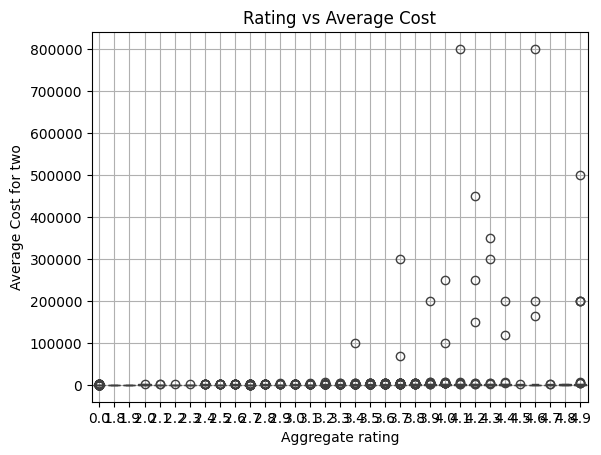

In [ ]:
sns.boxplot(data=zomato_df, x='Aggregate rating', y='Average Cost for two')
plt.title("Rating vs Average Cost")
plt.grid(True)
plt.show()

10. Top percentage cover of restaurants in a city (Pie chart)

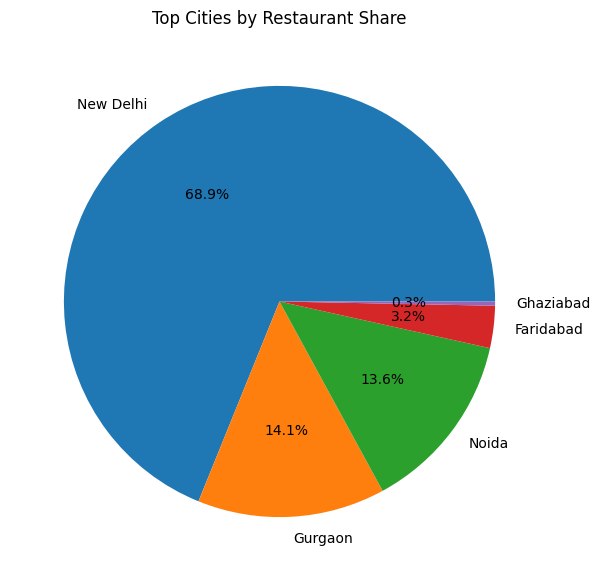

In [ ]:
city_counts = zomato_df['City'].value_counts().head(5)
city_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), title="Top Cities by Restaurant Share")
plt.ylabel('')
plt.show()

CONCLUSION - The analysis reveals that India hosts the largest number of Zomato-listed restaurants, with cities like Kolkata and Hyderabad leading in top ratings. North Indian cuisine dominates the Indian market, while each country favors its own regional specialties. A moderate positive correlation exists between user votes and ratings, and many affordable restaurants still achieve top scores